In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../src')
from utils import criterion

In [2]:
data = np.load('../data/exp4.npz')
data.files
M = 32

In [3]:
NU = data['NU']
rhos = data['rhos']
N_span = range(1, NU.shape[0] + 1)

In [4]:
FNC = (NU > 0).astype(float)
NvM = np.transpose(N_span * np.ones((1000,len(N_span))), (1,0))/M

In [5]:
dx = 1.01/M
dy = 0.01
xgrids = np.arange(0,4,dx)
ygrids = np.arange(0,1,dy)
FUC_heat = np.zeros((len(ygrids), len(xgrids)))
count = np.ones((len(ygrids), len(xgrids)))
for i in range(rhos.shape[0]):
    for jY in range(rhos.shape[1]):
        xx = int(NvM[i,jY]/dx)
        yy = int(rhos[i,jY]/dy)
        FUC_heat[len(ygrids) - 1 - yy, xx] = (FUC_heat[len(ygrids) - 1 - yy, xx] * (count[len(ygrids) - 1 - yy, xx] - 1) \
            + FNC[i,jY]) / count[len(ygrids) - 1 - yy, xx]
        count[len(ygrids) - 1 - yy, xx] = count[len(ygrids) - 1 - yy, xx] + 1.0

In [6]:
xdraw = np.linspace(0.001, 4)
ydraw = criterion(xdraw)

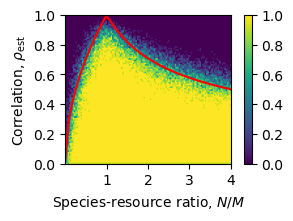

In [7]:
plt.figure(figsize=(2.8, 2.1), constrained_layout=True)
extent = .0, 4, 0, 1
plt.imshow(FUC_heat, extent=extent, aspect=3.6)
plt.colorbar()
plt.plot(xdraw, ydraw, 'r')
plt.xticks([1,2,3,4])

plt.xlabel('Species-resource ratio, $N/M$')
plt.ylabel(r'Correlation, $\rho_{\rm est}$')
plt.savefig('../figures/exp4.pdf')